In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

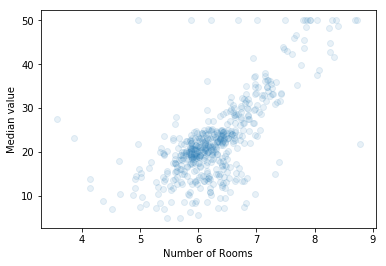

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

# plot MEDV against RM
plt.scatter(boston_df['RM'],boston_df['MEDV'],alpha=0.1)
plt.xlabel('Number of Rooms')
plt.ylabel('Median value')
plt.show()

Train Score: 0.45019179593422387
Test Score: 0.5877214395051775
Coefficients:  [8.76050748]


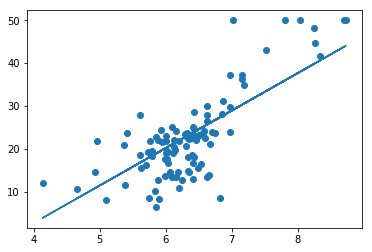

In [13]:
# Use only one feature RM
boston_X = boston.data[:, np.newaxis, 5]
boston_y = boston.target

X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 1)

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Train Score:', regr.score(X_train, y_train))
print('Test Score:', regr.score(X_test, y_test))

print('Coefficients: ', regr.coef_)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

plt.show()

Train Score: 0.6251836356449055
Test Score: 0.6753556251471677
[('RM', 4.538969403009868), ('LSTAT', -0.6593079493001401)]


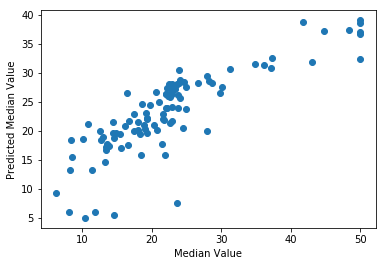

In [12]:
# Use multiple features 
boston_X = boston_df[["RM", "LSTAT"]]
boston_y = boston_df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 1)

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Train Score:', regr.score(X_train, y_train))
print('Test Score:', regr.score(X_test, y_test))

print(sorted(list(zip(['RM','LSTAT'], regr.coef_)), key = lambda x: abs(x[1]), reverse=True))

plt.scatter(y_test, y_pred)
plt.xlabel('Median Value')
plt.ylabel('Predicted Median Value')
plt.show()